In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
n=109
m=100

In [107]:
n_span =  n
Q = 500 #Nodal load
rise =  10 #Rise
x_span = 30
n_span = m
n_node = m*n+1
x_nodes = np.linspace(0,x_span*m,n_node)
y_nodes = np.zeros(n_node)


z_nodes = -(rise/(x_span**2/4))*((x_nodes%x_span-x_span/2)**2 - x_span**2/4)#parabolic arch
#z_nodes[0] = 0
#z_nodes[n_node-1] = 0
design_nodes = np.array([i for i in range(n_node) if i%n!=0 ])
non_design_nodes = np.array([i for i in range(n_node) if i%n==0])
#Connectivity
n_ele = n_node -1 #number of elements
cnct = np.zeros((n_ele,2),dtype=int) #connectivity matrix
x_ele = np.zeros((n_ele,2))
y_ele = np.zeros((n_ele,2))
z_ele = np.zeros((n_ele,2))
for i in range(n_ele):
    cnct[i,0] = i
    cnct[i,1] = i+1
    x_ele[i,:] = [x_nodes[i],x_nodes[i+1]]
    y_ele[i,:] = [y_nodes[i],y_nodes[i+1]]
    z_ele[i,:] = [z_nodes[i],z_nodes[i+1]]

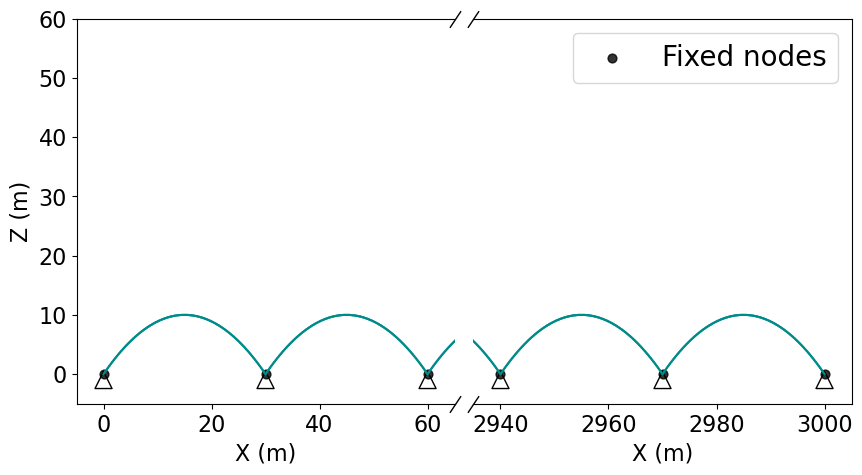

In [119]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10, 5))
fig.subplots_adjust(wspace=0.05)  # adjust space between axes

ax1.set_ylabel('Z (m)',fontsize=16)
ax1.set_xlabel('X (m)',fontsize=16)
ax2.set_xlabel('X (m)',fontsize=16)
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
ax1.set_xlim(-5,65)
ax2.set_xlim(2935,3005)
ax1.set_ylim(-5,60)
#Plot a basic wireframe.
for i in range(n_ele):
    ax1.plot([x_ele[i,0],x_ele[i,1]],[z_ele[i,0],z_ele[i,1]],color='darkcyan')
    ax2.plot([x_ele[i,0],x_ele[i,1]],[z_ele[i,0],z_ele[i,1]],color='darkcyan')

ax1.scatter(x_nodes[non_design_nodes],z_nodes[non_design_nodes],color='black',alpha=0.8,label='Fixed nodes',s=40)
ax1.scatter(x_nodes[non_design_nodes],z_nodes[non_design_nodes]-1, s=150, facecolors='none', edgecolors='black',marker='^')
#ax.scatter(x_nodes[design_nodes],z_nodes[design_nodes],color='blue',alpha=0.4,s=40)

ax2.scatter(x_nodes[non_design_nodes],z_nodes[non_design_nodes],color='black',alpha=0.8,label='Fixed nodes',s=40)
ax2.scatter(x_nodes[non_design_nodes],z_nodes[non_design_nodes]-1, s=150, facecolors='none', edgecolors='black',marker='^')
#ax.scatter(x_nodes[design_nodes],z_nodes[design_nodes],color='blue',alpha=0.4,s=40)

ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.get_yaxis().set_visible(False)


d = 1.5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1],[1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)

plt.legend(fontsize=20, loc='best')
plt.show()

In [12]:
z_nodes

array([-0.  ,  0.18,  0.32,  0.42,  0.48,  0.5 ,  0.48,  0.42,  0.32,
        0.18, -0.  ,  0.18,  0.32,  0.42,  0.48,  0.5 ,  0.48,  0.42,
        0.32,  0.18, -0.  ,  0.18,  0.32,  0.42,  0.48,  0.5 ,  0.48,
        0.42,  0.32,  0.18, -0.  ,  0.18,  0.32,  0.42,  0.48,  0.5 ,
        0.48,  0.42,  0.32,  0.18, -0.  ,  0.18,  0.32,  0.42,  0.48,
        0.5 ,  0.48,  0.42,  0.32,  0.18, -0.  ])